# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Professor Reponsavel:** Prof. Dr. André Carlos Ponce de Leon Ferreira de Carvalho
📧 andre@icmc.usp.br
🌐 [linkedin](https://www.linkedin.com/in/andr%C3%A9-carlos-ponce-de-leon-f-de-carvalho-151bb26/)
🔗 [site](http://www.cemeai.icmc.usp.br/component/teamdisplay/108)

# Prática: Visão Geral da Biblioteca Sklearn

**Autor:** Edesio Alcobaça
📧 edesio@usp.br
🌐 [linkedin](https://www.linkedin.com/in/ealcobaca/)
🔗 [site](https://ealcobaca.github.io/)

## Biblioteca Scikit-Learn 

A biblioteca sklearn é uma das mais utilizadas atualmente, tanto na academia quanto no mercado. O que faz ela tão popular é ser escrita em Python (linguagem muito usada no mercado), possuir um grupo de desenvolvedores ativo e ser Open Source.

A seguir descreveremos as principais funcionalidades da biblioteca, bem como os principais algoritmos desenvolvidos.

### Métodos de Classe Mais Usados


* **fit** *(X, [y])*: Constrói o modelo a partir do conjunto de treinamento. No caso de algoritmo não supervisonado o *y* pode ser omitido.
* **predict** *(X)*:  Prediz a classe ou valor de regressão.
* **predict_proba** *(X)*: Previsão das probabilidades de classe das amostras de entrada X.
* **score** *(X, y[, sample_weight])*: Retorna o score para o conjunto de dados:
   - Para classificação é acurácia
   - Para regressão é R2
* **set_params** *(params)*: Ajusta os hiperparâmetros do algoritmo.
* **get_params** *([deep])*: Retorna os hiperparâmetros do algoritmo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons, make_blobs, make_regression, make_classification
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=42)
model = lrc.fit(X_train, y_train)

preds = model.predict(X_test)
predsp = model.predict_proba(X_test)
scores = model.score(X_test, y_test)

In [4]:
print("Model: ", lrc)
print("Model hps: ", lrc.get_params())
print("Model Score: ", scores)
print("Model prediction: \n", preds[:10])
print("Model prediction (proba): \n", predsp[:10])

Model:  LogisticRegression(random_state=42)
Model hps:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model Score:  0.94
Model prediction: 
 [1 2 2 0 0 0 1 2 2 2]
Model prediction (proba): 
 [[0.00010604 0.99988101 0.00001294]
 [0.00681164 0.00000441 0.99318395]
 [0.00124705 0.00063736 0.99811559]
 [0.9981574  0.00003683 0.00180576]
 [0.99644246 0.00000272 0.00355483]
 [0.99873481 0.00000168 0.00126351]
 [0.00007422 0.99987744 0.00004834]
 [0.00242916 0.00004639 0.99752445]
 [0.39413349 0.0837987  0.52206781]
 [0.00635346 0.00354697 0.99009957]]


* **transform**: Aplica uma transformação nos dados
* **fit_transform**: Faz fit e a seguir aplica a tranformação nos dados de entrada

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_test_ = scaler.transform(X_test)
X_test_[:10]

array([[ 1.08678365, -1.5164436 ],
       [-1.55876784,  0.65593415],
       [-1.31288369, -0.37880668],
       [ 0.24177302,  1.46105908],
       [-0.09670804,  1.81924233],
       [ 0.05017578,  1.9255206 ],
       [ 0.81429729, -1.62586094],
       [-1.46497424,  0.12512164],
       [-0.23033232, -0.0316933 ],
       [-1.01038457, -0.33584257]])

In [6]:
X_train_ = scaler.fit_transform(X_train)
X_train_[:10]

array([[ 0.29038368,  1.12950646],
       [-1.13999693,  0.59901388],
       [ 0.01306258,  1.97048737],
       [ 1.50049455, -2.55336023],
       [ 0.37695627, -1.46288631],
       [ 0.49285469, -1.82403643],
       [ 0.6848445 , -0.01627551],
       [-1.62026329, -0.38417894],
       [ 0.97952963,  0.19779602],
       [ 1.8370938 , -0.70870969]])

## Algoritmos de Classificação

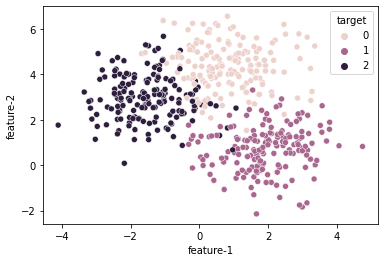

In [7]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
        'target': y
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=features[1], hue=target)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Logistic Regression ([LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

In [8]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=42)
model = lrc.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 2 2]
0.94


### k-Nearest Neighbors ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier))

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 0 2]
0.9266666666666666


### Decision Tree ([DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
model = dtc.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 0 2]
0.9266666666666666


### Naive Bayes ([GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB))



In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 2 2]
0.9333333333333333


### Random Forest ([RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
model = rfc.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 0 2]
0.94


### Support Vector Machine ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC))

In [13]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
model = svc.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 2 2]
0.9333333333333333


### Multi-layer Perceptron classifier ([MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
model = mlp.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[1 2 2 0 0 0 1 2 0 2]
0.92


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Algoritmos de Regressão

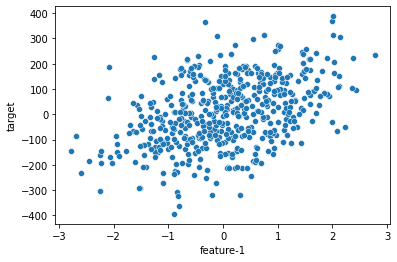

In [15]:
X, y = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=8,
    noise=30,
    random_state=1
    )

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'target': y
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=target)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Lasso Regression ([Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html))

In [16]:
from sklearn.linear_model import Lasso

las = Lasso(random_state=42)
model = las.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[-115.7708748   -46.31684795  -20.86665902 -158.62497355  382.25990628
 -124.28940267   68.21063266 -164.95106788 -328.33404498  222.81955835]
0.9469180813122322


### Ridge Regression ([Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html))

In [17]:
from sklearn.linear_model import Ridge

rid = Ridge(random_state=42)
model = rid.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[-122.78992165  -46.12780147  -21.94305706 -162.50410571  387.85141669
 -125.93351061   71.01896076 -167.59242227 -334.32584704  225.75003396]
0.9468979075721193


### ElasticNet Regression ([ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html))

In [18]:
from sklearn.linear_model import ElasticNet

ent = ElasticNet(random_state=42)
model = ent.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[ -71.19710668  -25.93729254  -15.55881416 -101.25000773  253.68386461
  -78.39175189   42.01147833 -104.95807672 -219.87137993  160.11027644]
0.8339397652780292


### k-Nearest Neighbors ([KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html))

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
model = knr.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[ -99.6684154   -16.38105864  -50.66401373  -57.41325167  239.25981724
 -128.72638105   83.64068093 -146.05781319 -255.81035766  152.25888883]
0.7061793685321538


### Decision Tree ([DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html))

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
model = dtr.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[  55.72824398  -34.50897194  -28.69026748 -145.85559682  271.30919082
  -70.81129949  171.02917036 -145.85559682 -325.1987638   274.33407544]
0.5160527339479416


### Random Forest ([RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html))


In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
model = rfr.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[  20.76497775  -42.55837779  -18.29176778 -144.37866485  220.38690089
 -116.62771554   80.32152021 -140.88008257 -261.07696054  231.43698006]
0.8019931629888762


### Support Vector Machine ([SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html))

In [22]:
from sklearn.svm import SVR

svr = SVR()
model = svr.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[  0.44496551  -2.50843853   1.67095038  -3.91897052  16.13692994
  -7.41046195   6.61101378  -9.16400223 -11.47253449  19.69234491]
0.10988234690190335


### Multi-layer Perceptron([MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html))

In [23]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=42)
model = mlpr.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)

print(pred[:10])
print(score)

[-68.09169775  -8.98875781 -19.65923616 -40.95727195 158.65427625
 -30.366409    39.17966508 -46.90013887 -99.71012589 106.20396741]
0.5630287207632332


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Algoritmos de Agrupamento

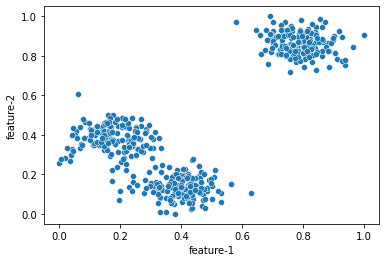

In [24]:
X, _ = make_blobs(n_samples=500, n_features=2, centers=3, random_state=1)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=features[1])
plt.show()

### K-Means ([KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42)
y_ = kmeans.fit_predict(X)

print(y_[:10])

[1 4 7 3 2 3 5 2 5 6]


### Agglomerative Clustering ([AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html))

In [26]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering()
y_ = agc.fit_predict(X)

print(y_[:10])

[0 0 0 1 0 1 0 0 0 0]


### Density-Based Spatial Clustering of Applications with Noise ([DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html))



In [27]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN()
y_ = dbs.fit_predict(X)

print(y_[:10])

[0 0 0 0 0 0 0 0 0 0]


## Técnicas de Pré-Processamento & Redução de Dimensionalidade

Existe uma vasta gama de técnicas de pré-processamento e redução de dimensionalidade no sklearn. Você pode encontrar mais informações sobre elas nos seguintes links:

* [técnicas de pré-processamento](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
* [técnicas de redução de dimensionalidade](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)

A seguir destacaremos as mais comuns bem como um exemplo de uso com código:


### Imputação para Completar Valores Ausentes ([SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html))

In [28]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

X[:25, 0] = np.nan 
X[25:50, 1] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
list(map(lambda x: np.isnan(x).sum(), [X_train, X_test, y_train, y_test]))

[32, 18, 0, 0]

In [29]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit(X_train)

X_train_ = imp_mean.transform(X_train)
X_test_ = imp_mean.transform(X_test)

print("Train nan [count]: ", np.isnan(X_train).sum())
print("Train nan [count]: ", np.isnan(X_test).sum())

print("Train transformed nan [count]: ", np.isnan(X_train_).sum())
print("Test transformed nan [count]: ", np.isnan(X_test_).sum())

Train nan [count]:  32
Train nan [count]:  18
Train transformed nan [count]:  0
Test transformed nan [count]:  0


### Dimensiona as Features para um Determinado Intervalo ([MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html))

In [30]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
list(map(lambda x: (np.min(x), np.max(x)), [X_train, X_test, y_train, y_test]))

[(-4.10970064619185, 6.560510824746599),
 (-3.3511606691597353, 6.213852280547424),
 (0, 2),
 (0, 2)]

In [31]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(X_train)

X_train_ = mm.transform(X_train)
X_test_ = mm.transform(X_test)

print("X_train min/max", (np.min(X_train_), np.max(X_train_)))
print("X_test min/max", (np.min(X_test_), np.max(X_test_)))

X_train min/max (0.0, 1.0)
X_test min/max (0.04484147438192271, 0.960195322826444)


### Seleção de Features ([SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html))

In [32]:
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
list(map(lambda x: x.shape, [X_train, X_test, y_train, y_test]))

[(350, 10), (150, 10), (350,), (150,)]

In [33]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=5)
skb.fit(X_train, y_train)

X_train_ = skb.transform(X_train)
X_test_ = skb.transform(X_test)

print("X_train shape: ", X_train_.shape)
print("X_test shape: ", X_test_.shape)

X_train shape:  (350, 5)
X_test shape:  (150, 5)


### Principal Component Analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))

In [34]:
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
list(map(lambda x: x.shape, [X_train, X_test, y_train, y_test]))

[(350, 10), (150, 10), (350,), (150,)]

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_ = ss.transform(X_train)
X_test_ = ss.transform(X_test)

pca = PCA(n_components=5, random_state=0)
pca.fit(X_train_)

X_train_pca = pca.transform(X_train_)
X_test_pca = pca.transform(X_test_)

print("X_train shape: ", X_train_pca.shape)
print("X_test shape: ", X_test_pca.shape)

X_train shape:  (350, 5)
X_test shape:  (150, 5)


## Criando Pipelines

Os [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) são ferramentas especialmente úteis quando queremos aplicar diferentes técnicas antes da modelagem. Além disso, este pode nos ajudar a evitar escrever longos scripts de código.

O Pipeline aplica sequencialmente uma lista de transformações e um estimador final. Desta maneira, para as etapas intermediárias ele aplica o `fit` e `transform` automaticamente.

A seguir exemplificamos como o pipeline funciona.

### Sem o uso do Pipeline

Queremos fazer as seguintes tarefas:

1. Inputação de valores
2. Normalização dos dados (z-score)
3. Redução via PCA para 5 features
4. Modelagem por meio do Logistic Regression

In [36]:
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=0)

X[:25, 0] = np.nan 
X[25:50, 1] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit(X_train)

X_train_imp = imp_mean.transform(X_train)
X_test_imp = imp_mean.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_imp)

X_train_ss = ss.transform(X_train_imp)
X_test_ss = ss.transform(X_test_imp)

pca = PCA(n_components=5, random_state=0)
pca.fit(X_train_ss)

X_train_pca = pca.transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)

lr = LogisticRegression(random_state=42)
model = lr.fit(X_train_pca, y_train)
preds = model.predict(X_test_pca)
predsp = model.predict_proba(X_test_pca)
scores = model.score(X_test_pca, y_test)

print("Model: ", lr)
print("Model hps: ", lr.get_params())
print("Model Score: ", scores)
print("Model prediction: \n", preds[:10])
print("Model prediction (proba): \n", predsp[:10])

Model:  LogisticRegression(random_state=42)
Model hps:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Model Score:  0.7733333333333333
Model prediction: 
 [1 1 0 0 1 0 0 1 1 0]
Model prediction (proba): 
 [[0.27950121 0.72049879]
 [0.42193184 0.57806816]
 [0.96734767 0.03265233]
 [0.58694956 0.41305044]
 [0.40789539 0.59210461]
 [0.98215815 0.01784185]
 [0.51741084 0.48258916]
 [0.36402651 0.63597349]
 [0.25303639 0.74696361]
 [0.87368411 0.12631589]]


### Com o uso do Pipeline

Queremos fazer as mesmas tarefas anteriores:

1. Inputação de valores
2. Normalização dos dados (z-score)
3. Redução via PCA para 5 features
4. Modelagem por meio do Logistic Regression

In [38]:
from sklearn.pipeline import Pipeline

steps = [
         ('si', SimpleImputer(missing_values=np.nan, strategy="mean")),
         ('ss', StandardScaler()),
         ('pca', PCA(n_components=5, random_state=42)),
         ('lrc', LogisticRegression(random_state=42))
        ]

pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)
predsp = pipe.predict_proba(X_test)
scores = pipe.score(X_test, y_test)

print("Model: ", pipe)
print("Model Score: ", scores)
print("Model prediction: \n", preds[:10])
print("Model prediction (proba): \n", predsp[:10])

Model:  Pipeline(steps=[('si', SimpleImputer()), ('ss', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42)),
                ('lrc', LogisticRegression(random_state=42))])
Model Score:  0.7733333333333333
Model prediction: 
 [1 1 0 0 1 0 0 1 1 0]
Model prediction (proba): 
 [[0.27950121 0.72049879]
 [0.42193184 0.57806816]
 [0.96734767 0.03265233]
 [0.58694956 0.41305044]
 [0.40789539 0.59210461]
 [0.98215815 0.01784185]
 [0.51741084 0.48258916]
 [0.36402651 0.63597349]
 [0.25303639 0.74696361]
 [0.87368411 0.12631589]]


## Seleção de Modelos

### Métricas e pontuações: quantificando a qualidade das previsões ([Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html))

In [39]:
from sklearn.metrics import balanced_accuracy_score

y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]

balanced_accuracy_score(y_true, y_pred)

0.625

### Cross-validation: Avalição da Performance de Modelos ([CV](https://scikit-learn.org/stable/modules/cross_validation.html))

#### Divisão em Treinamento e *Teste*

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

[i.shape for i in [X, y]]

[(150, 4), (150,)]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[i.shape for i in [X_train, X_test, y_train, y_test]]

[(105, 4), (45, 4), (105,), (45,)]

#### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="balanced_accuracy")
scores

array([0.91666667, 1.        , 1.        , 0.75      , 0.83333333,
       1.        , 1.        , 0.80555556, 1.        , 0.91666667])

### Tuning the hyper-parameters of an estimator ([HPT](https://scikit-learn.org/stable/modules/grid_search.html))

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X, y = make_moons()

tune_parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.linspace(1, 32, 32, endpoint=True),
    "min_samples_leaf": np.linspace(0.01, 0.1, 5, endpoint=True)
    }

In [44]:
clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tune_parameters,
    scoring="balanced_accuracy",
    cv=10,
    refit=True
)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                         'min_samples_leaf': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ])},
             scoring='balanced_accuracy')

In [45]:
clf.score(X_test, y_test)

1.0

## Salvando e Carregando modelos

É possível salvar um modelo do `scikit-learn` usando o protocolo de serialização e de-serialização de objetos em Python chamado [`pickle`](https://docs.python.org/3/library/pickle.html):

### Salvando um modelo

In [46]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [47]:
import pickle

model_name = "my_model.pkl"
with open(model_name, 'wb') as file: 
  pickle.dump(model, file)

### Carregando um Modelo

In [48]:
import pickle

model_name = "my_model.pkl"
with open(model_name, 'rb') as file: 
  pickled_model = pickle.load(file)

In [49]:
preds = pickled_model.predict(X_test)
predsp = pickled_model.predict_proba(X_test)
scores = pickled_model.score(X_test, y_test)

print("Model Score: ", scores)
print("Model prediction: \n", preds[:10])
print("Model prediction (proba): \n", predsp[:10])

Model Score:  1.0
Model prediction: 
 [0 2 2 2 2 1 1 2 0 1]
Model prediction (proba): 
 [[0.99985755 0.0000996  0.00004284]
 [0.00001745 0.00016558 0.99981698]
 [0.00004946 0.00008208 0.99986846]
 [0.00004331 0.0001275  0.99982919]
 [0.00002165 0.00026253 0.99971582]
 [0.00232173 0.99603898 0.00163929]
 [0.00024187 0.99971246 0.00004567]
 [0.00038217 0.00214574 0.99747209]
 [0.99954522 0.00037273 0.00008205]
 [0.00190224 0.99772551 0.00037225]]


## Referências & Links



1. [Scikit-learn user guide](https://scikit-learn.org/stable/user_guide.html)
2. [An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) 
3. [Scikit-learn example gallery](https://scikit-learn.org/stable/auto_examples/index.html)

<font size="1"> © <a href="https://github.com/ealcobaca">ealcobaca</a> *(2022)* </font>